In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\omkar\OneDrive\Documents\Internship\New\Sentiment_140 (2).csv")

In [3]:
df.head()

,review,sentiment,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,@grazzly maaaaaate will you be at Glasto? Not ...,NEGATIVE,NaN,NaN,NaN,NaN,NaN
1,@Monkeylover35 Yeah. I had to get away for a b...,POSITIVE,NaN,NaN,NaN,NaN,NaN
2,The World is just amazing!,POSITIVE,NaN,NaN,NaN,NaN,NaN
3,Just picked my sister up from work. she's al...,NEGATIVE,NaN,NaN,NaN,NaN,NaN
4,I don't think changing my last name is meant t...,NEGATIVE,NaN,NaN,NaN,NaN,NaN


In [4]:
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': -1})

In [5]:
df.head()

,review,sentiment,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,@grazzly maaaaaate will you be at Glasto? Not ...,NEGATIVE,NaN,NaN,NaN,NaN,NaN
1,@Monkeylover35 Yeah. I had to get away for a b...,POSITIVE,NaN,NaN,NaN,NaN,NaN
2,The World is just amazing!,POSITIVE,NaN,NaN,NaN,NaN,NaN
3,Just picked my sister up from work. she's al...,NEGATIVE,NaN,NaN,NaN,NaN,NaN
4,I don't think changing my last name is meant t...,NEGATIVE,NaN,NaN,NaN,NaN,NaN


In [7]:
df=df.drop("Unnamed:2",axis=1)

KeyError: "['Unnamed:2'] not found in axis"

In [6]:
#%% Importing the libraries

import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import seaborn
import itertools
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from wordcloud import  STOPWORDS
from sklearn import ensemble
from sklearn import tree
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.util import mark_negation
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (15, 9)

import warnings
warnings.filterwarnings("ignore")

In [7]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)  # Tokenize the text into words
    tokens = [word for word in tokens if word.isalnum()]  # Remove non-alphanumeric tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens]  # Lemmatize the words
    return tokens

In [9]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [12]:
vectorizer = TfidfVectorizer(tokenizer=tokenize_and_lemmatize, max_features=5000) 
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [15]:
y_pred_logreg = logreg_model.predict(X_test_tfidf)

In [16]:
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8269597558649628
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.84      0.94      0.88     14827
    POSITIVE       0.79      0.55      0.65      6145

    accuracy                           0.83     20972
   macro avg       0.81      0.75      0.77     20972
weighted avg       0.82      0.83      0.82     20972



KeyboardInterrupt: 

In [17]:
y_pred_svm = svm_model.predict(X_test_tfidf)

NameError: name 'svm_model' is not defined

In [18]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("\nSVM Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

NameError: name 'y_pred_svm' is not defined

In [13]:
classifiers = {
    'Logistic Regression' :LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

Training and evaluating Logistic Regression...
Logistic Regression Accuracy: 0.8269597558649628
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.84      0.94      0.88     14827
    POSITIVE       0.79      0.55      0.65      6145

    accuracy                           0.83     20972
   macro avg       0.81      0.75      0.77     20972
weighted avg       0.82      0.83      0.82     20972



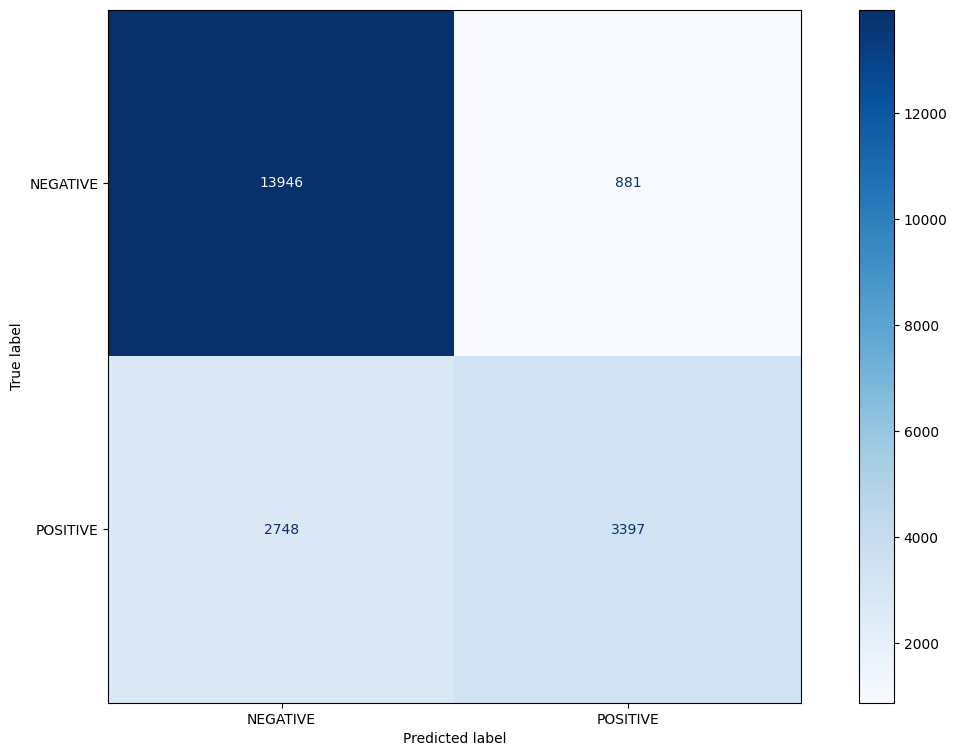

Training and evaluating SVM...
SVM Accuracy: 0.8256723250047683
SVM Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.84      0.94      0.88     14827
    POSITIVE       0.78      0.56      0.65      6145

    accuracy                           0.83     20972
   macro avg       0.81      0.75      0.77     20972
weighted avg       0.82      0.83      0.82     20972



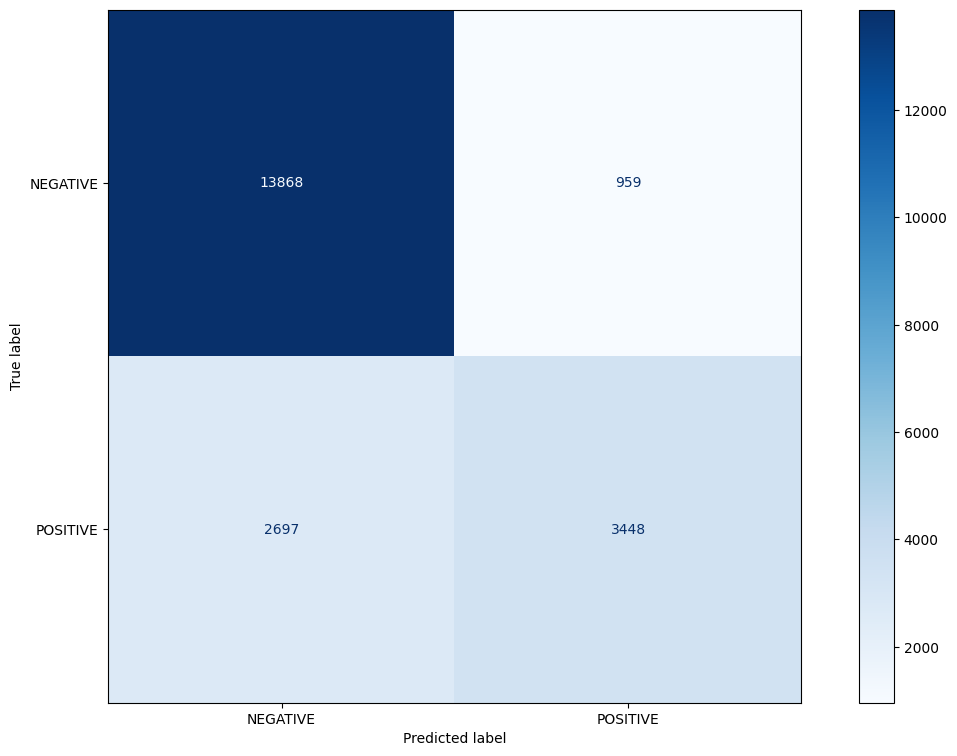

Training and evaluating Random Forest...
Random Forest Accuracy: 0.8147053213808888
Random Forest Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.82      0.95      0.88     14827
    POSITIVE       0.80      0.49      0.61      6145

    accuracy                           0.81     20972
   macro avg       0.81      0.72      0.74     20972
weighted avg       0.81      0.81      0.80     20972



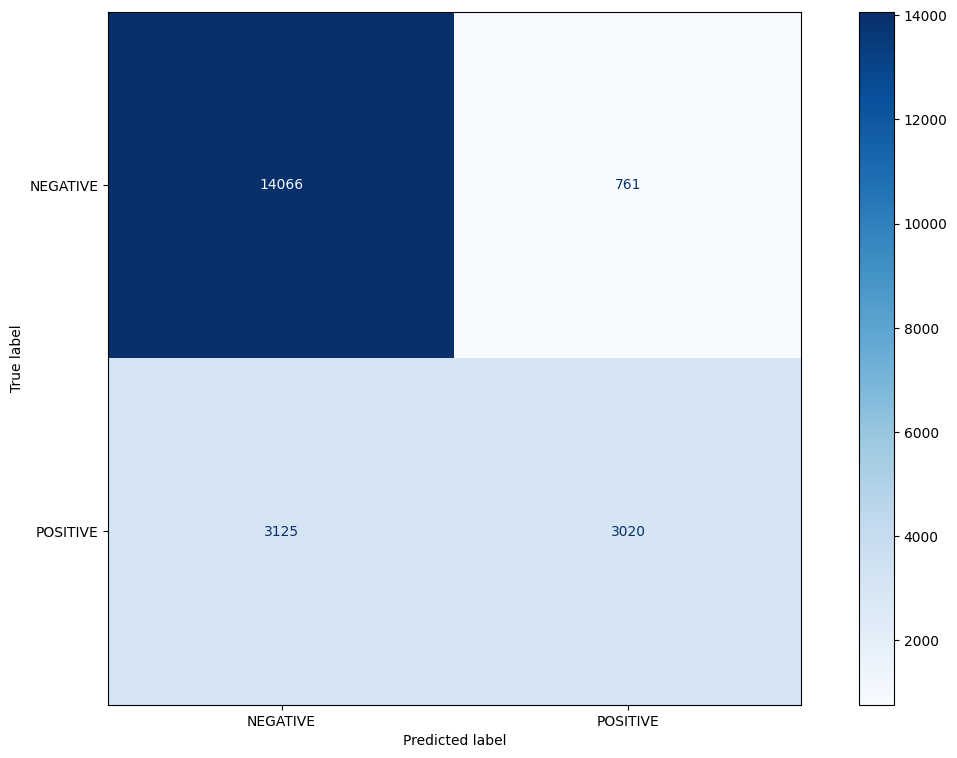

Training and evaluating Naive Bayes...
Naive Bayes Accuracy: 0.7837116154873164
Naive Bayes Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.77      0.98      0.87     14827
    POSITIVE       0.89      0.30      0.45      6145

    accuracy                           0.78     20972
   macro avg       0.83      0.64      0.66     20972
weighted avg       0.81      0.78      0.74     20972



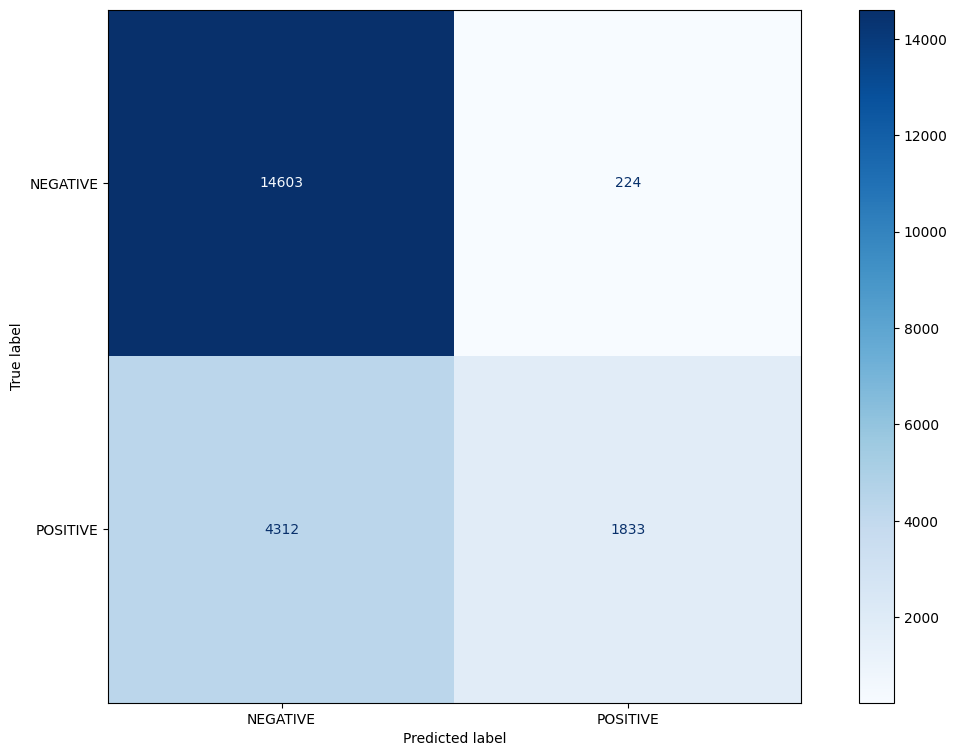

Training and evaluating K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.6902536715620827
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.75      0.84      0.79     14827
    POSITIVE       0.46      0.33      0.38      6145

    accuracy                           0.69     20972
   macro avg       0.61      0.58      0.59     20972
weighted avg       0.67      0.69      0.67     20972



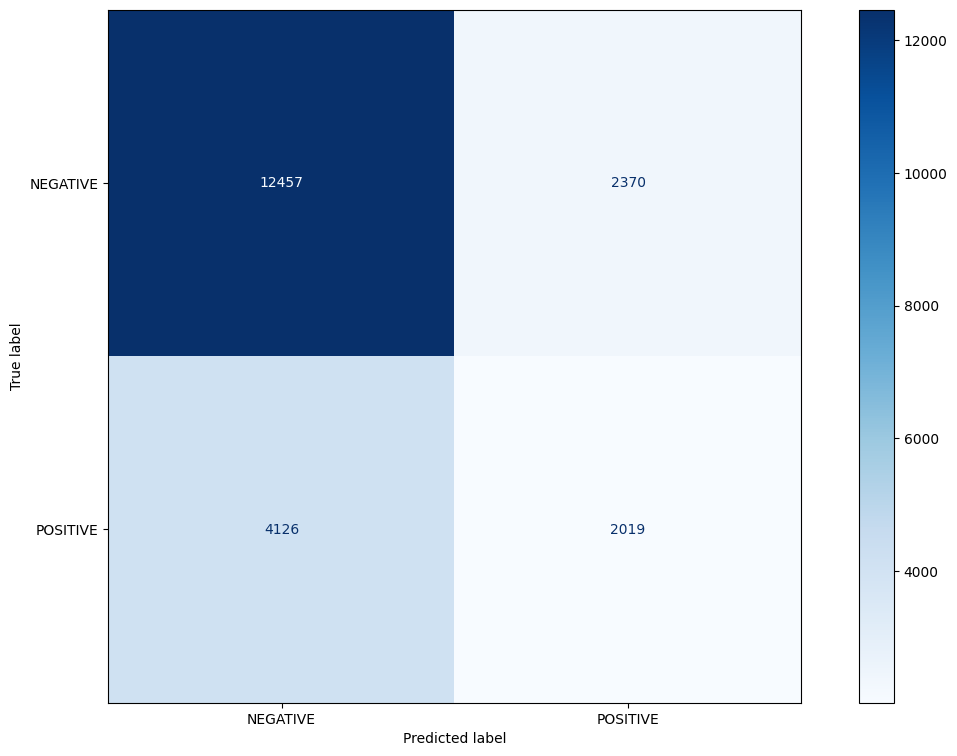

In [15]:
for clf_name, clf in classifiers.items():
    print(f"Training and evaluating {clf_name}...")
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} Accuracy: {accuracy}")
    print(f"{clf_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=["NEGATIVE", "POSITIVE" ])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NEGATIVE", "POSITIVE" ])
    disp.plot(cmap=plt.cm.Blues)
    plt.show()